$\newcommand{\calf}{{\cal F}}
\newcommand{\dnu}{d \nu}
\newcommand{\mf}{{\bf F}}
\newcommand{\vu}{{\bf u}}
\newcommand{\vx}{{\bf x}}
\newcommand{\ve}{{\bf e}}
\newcommand{\mg}{{\bf G}}
\newcommand{\ml}{{\bf L}}
\newcommand{\mg}{{\bf G}}
\newcommand{\ma}{{\bf A}}
\newcommand{\mi}{{\bf I}}
\newcommand{\mm}{{\bf M}}
\newcommand{\diag}{\mbox{diag}}
\newcommand{\begeq}{{\begin{equation}}}
\newcommand{\endeq}{{\end{equation}}}
$

In [14]:
using SIAMFANLEquations
using SIAMFANLEquations.TestProblems
using PyPlot
using NotebookSIAMFANL

# Chapter 1: Introduction

## Section 1.1: What is the problem?

Nonlinear equations are solved as part of almost all simulations of
physical processes. Physical models that are expressed as
nonlinear partial differential equations, for example, become
large systems of nonlinear equations when discretized. Authors of
simulation codes must either use a nonlinear solver as a tool or
write one from scratch. The purpose of this book is to show
these authors what technology is available, sketch the implementation,
and warn of the problems. We do this via algorithmic outlines,
nonlinear solvers in Julia that can be used for
production work, a suite of example problems, an IJulia notebook,
and chapter-ending projects.

We use the standard notation

\begin{equation}
\mf(\vx) = 0
\end{equation}

for systems of $N$ equations in $N$ unknowns.
Here $\mf:R^N  \to R^N$. We will call $\mf$ the
__nonlinear residual__
 or simply the __residual__.
Rarely can the solution of a nonlinear equation be given by
a closed-form expression, so iterative methods must be used
to approximate the solution numerically.
The output of an iterative method
is a sequence of approximations to a solution.


### Section 1.1.1: Notation


In this book, following the convention in 
<cite data-cite="ctk:roots"><a href="siamfa.html#ctk:roots">(Kel95)</cite>
and
<cite data-cite="ctk:newton"><a href="siamfa.html#ctk:newton">(Kel03)</cite>,
vectors are to be understood as column vectors.
We denote vectors by boldfaced lower case letters
and matrices by boldfaced upper case letters,
for example $\vx$  and $\ma$. We denote the $i$th component of $\vx$
by $x_i$ to distinguish between the $i$th member of a sequence of
vectors $\vx_i$. We denote the $ij$ entry of $\ma$ by $\ma_{ij}$.

The vector
$\vx^*$ will denote a solution, $x$ a potential solution,
and $\{ \vx_n \}_{n \ge 0}$ the sequence of iterates. We will refer to
$\vx_0$ as the
\index{Initial!guess}
\index{Initial!iterate}{\bf initial iterate (not guess!)}.
We will denote
the $i$th component of a vector $\vx$ by $x_i$
and the $i$th component of an index vector
$\vx_n$ by $x_{ni}$. We will rarely need
to refer to individual components of vectors.
We will let
$\partial \mf/\partial x_i$ denote the partial derivative of $\mf$
with respect to
$x_i$. As is standard
<cite data-cite="dens"><a href="siamfa.html#dens">(DS96)</cite>,
<cite data-cite="ctk:roots"><a href="siamfa.html#ctk:roots">(Kel95)</cite>,
$\ve = \vx - \vx^*$ will denote the error. So, for example,
$\ve_n = \vx_n - \vx^*$ is the error in the $n$th iterate.
    
If the components of $\mf$ are differentiable at $\vx \in R^N$,
we define the __Jacobian matrix__
$\mf'(\vx)$ by
    
$$
\mf'(\vx)_{ij} = \frac{\partial f_i}{\partial x_j} (\vx).
$$
Throughout the book, $\| \cdot \|$ will denote the Euclidean norm
on $R^N$:
    
$$
\| \vx \| = \left( \sum_{i=1}^N x_i^2 \right)^{1/2}.
$$


We treat scalar equations with lowercase letters. So a scalar equation
is $f(x) = 0$ and the derivative is $f'(x)$.
Many of the essential ideas in this book can be illustrated with scalar
equations and we do that in this chapter. The exception is the need to
solver linear systems of equations and linear least squares problems, which
will be the focus of the remaining chapters in the book.
The Julia codes for the examples in this section are in the
[src/ScalarEquations](src/ScalarEquations)
directory for the notebook. The solvers and
test problems are part of the [SIAMFANLEquations](https://github.com/ctkelley/NotebookSIAMFANL) Julia package.
    


## Section 1.2: Newton's Method

Most of the methods in this book are variations of Newton's method.
The exception will be Anderson acceleration, which we cover in
Chapter~\ref{ch:anderson}.

The Newton sequence is

$$
\vx_{n+1} = \vx_n - \mf'(\vx_n)^{-1} \mf(\vx_n).
$$

The interpretation of \eqnok{newtonseq} is that
we model $\mf$ at the current iterate $\vx_n$ with a linear
function
$$
\mm_n(x) = \mf(\vx_n) + \mf'(\vx_n) (\vx - \vx_n)
$$
and let the root of $\mm_n$ be the next iteration.
$\mm_n$ is called the
__local linear model__.
If $\mf'(\vx_n)$ is
nonsingular, then the Newton sequence is the solution of $\mm_n(\vx_{n+1}) = 0$.

We illusrate  the local linear model and the
Newton iteration for the scalar equation
\[
\arctan(x) = 0
\]
with initial iterate $x_0 = 1$. We graph the local linear model
\[
m_j(x) = f(x_j) + f'(x_j) (x - x_j)
\]
at $x_j$ from the point $(x_j, y_j) = (x_j, f(x_j))$ to the next iteration
$(x_{j+1},0)$. The iteration converges rapidly and one can see the
linear model becoming more and more accurate. The third iterate is
visually indistinguishable from the solution.

Run the code window below to see the plot. The code __atan_test.jl__ runs the solver
__nsolsc.jl__ from the[SIAMFANLEquations](https://github.com/ctkelley/NotebookSIAMFANL) Julia package,
collects the data for the plot, and then runs some messy PyPlot commands. We will discuss the solver in detail
in [Section 1.10](#Section-1.10:-Scalar-Equation-Solver). For now we will focus on the results

The Julia program {\tt atan\_test.jl}
creates Figure~\ref{fig:1dloc} and the other figures in this chapter
for the $\arctan$ function.

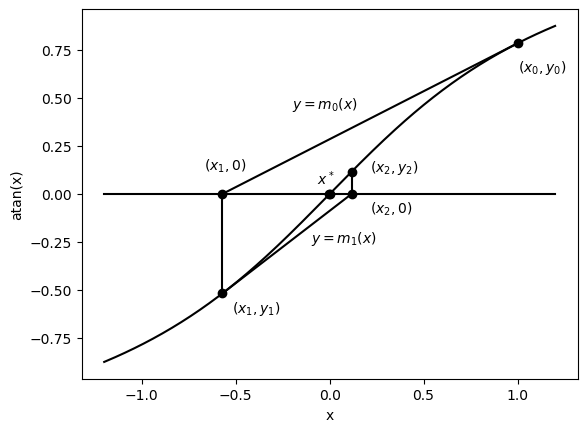

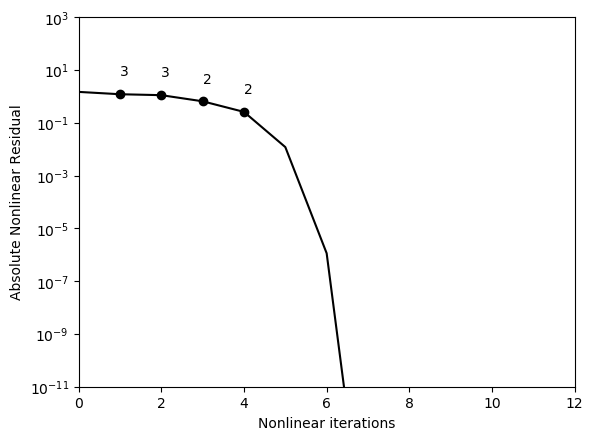

(ithistl = (solution = 7.96310e-10, functionval = 7.96310e-10, history = [7.85398e-01, 5.18669e-01, 1.16332e-01, 1.06102e-03, 7.96310e-10], iarm = [0, 0, 0, 0, 0], idid = true, solhist = [1.00000e+00, -5.70796e-01, 1.16860e-01, -1.06102e-03, 7.96310e-10]), ithistg = (solution = 9.71970e-19, functionval = 9.71970e-19, history = [1.47113e+00, 1.19982e+00, 1.10593e+00, 6.48297e-01, 2.56983e-01, 1.19361e-02, 1.13383e-06, 9.71970e-19], iarm = [0, 2, 1, 1, 0, 0, 0, 0], idid = true, solhist = [1.00000e+01, 2.57081e+00, -1.99395e+00, 7.57520e-01, -2.62793e-01, 1.19367e-02, -1.13383e-06, 9.71970e-19]))

In [15]:
atan_test()


## Section 1.10: Scalar Equation Solver